In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [54]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [55]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
160550,Lazy River,Eleven,"['Harry Connick, Jr.']",0.541,0.0410,0.208000,0.194000,0.0827,0.6600,0.4120,84.260,165440,1979
980309,Hey Alligator,The Aviary,['Galantis'],0.697,0.0352,0.024400,0.000004,0.6000,0.6490,0.7740,124.001,209173,2017
886587,Sleepless Nights - Live at Graspop,Songs for the Dead: Live at Graspop Metal Meeting,['King Diamond'],0.264,0.0452,0.000063,0.000384,0.9930,0.3650,0.8500,142.279,310443,2019
354376,Renaissance Part II,Les origines du mal,['Souldia'],0.232,0.3360,0.185000,0.000000,0.0687,0.3770,0.8320,80.373,193520,2012
322738,Hallelujah,Hallelujah,"['Peter Hollens', 'Alisha Popat']",0.336,0.0313,0.928000,0.000000,0.1040,0.1660,0.1420,102.361,293534,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243361,Sea Dream,"Sohanstag, PhD",['Sohanstag'],0.548,0.0332,0.881000,0.060500,0.1010,0.1240,0.2420,115.952,258621,2010
553884,Qui je suis,Là dans ma tête,['Marc Dupré'],0.432,0.0417,0.026100,0.000000,0.3530,0.3910,0.8030,128.030,189387,2014
1004496,Love,Gemini,['Dave East'],0.412,0.3460,0.079000,0.000000,0.3430,0.7100,0.8130,86.372,208640,2013
487092,Aphōnos,Scar Sighted,['Leviathan'],0.146,0.0378,0.063200,0.915000,0.2440,0.0635,0.4040,69.409,463139,2015


The coorelation between Danceability and Tempo is (0.07104950536096816, 5.94545476959463e-15).
The r-value is: 0.005048032212038265


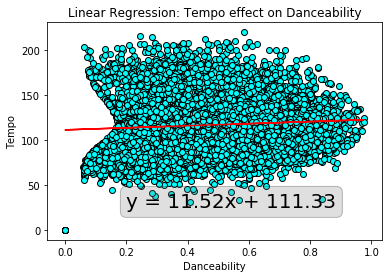

In [65]:
#tempo analysis
tempo_coorelation = (st.pearsonr(sampled_data["Danceability"], sampled_data["Tempo"]))
print(f'The coorelation between Danceability and Tempo is {tempo_coorelation}.')

linear_regression = st.linregress(sampled_data["Danceability"], sampled_data["Tempo"])
#linear_regression

props = dict(boxstyle='round', facecolor='grey', alpha=0.25)
x_values = sampled_data["Danceability"]
y_values = sampled_data["Tempo"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(.2,25), fontsize=20, bbox=props)
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.title("Linear Regression: Tempo effect on Danceability")


print(f"The r-value is: {rvalue**2}")

plt.savefig("Images/tempo-danceability.png")
plt.show()

The coorelation between Danceability and Energy is (0.07104950536096816, 5.94545476959463e-15).
The r-value is: 0.07841080111251926


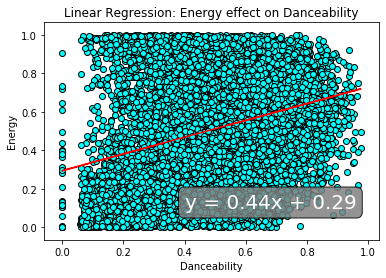

In [66]:
#energy analysis
energy_coorelation = (st.pearsonr(sampled_data["Danceability"], sampled_data["Energy"]))
print(f'The coorelation between Danceability and Energy is {tempo_coorelation}.')

linear_regression = st.linregress(sampled_data["Danceability"], sampled_data["Energy"])
#linear_regression

props = dict(boxstyle='round', facecolor='grey', alpha=0.85)
x_values = sampled_data["Danceability"]
y_values = sampled_data["Energy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(.4,.1), fontsize=20, bbox=props, color="white")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Linear Regression: Energy effect on Danceability")


print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/energy-danceability.png")
plt.show()

The coorelation between Danceability and Duration(ms) is (0.07104950536096816, 5.94545476959463e-15).
The r-value is: 0.013307591197381403


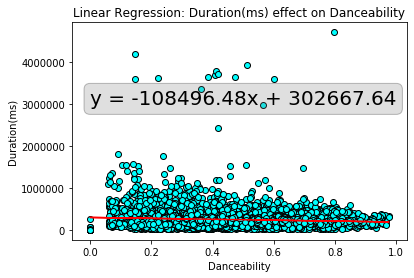

In [67]:
#Duration(m/s) analysis
duration_coorelation = (st.pearsonr(sampled_data["Danceability"], sampled_data["Duration(ms)"]))
print(f'The coorelation between Danceability and Duration(ms) is {tempo_coorelation}.')

linear_regression = st.linregress(sampled_data["Danceability"], sampled_data["Duration(ms)"])
#linear_regression

props = dict(boxstyle='round', facecolor='grey', alpha=0.25)
x_values = sampled_data["Danceability"]
y_values = sampled_data["Duration(ms)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,3000000), fontsize=20, bbox=props)
plt.xlabel("Danceability")
plt.ylabel("Duration(ms)")
plt.title("Linear Regression: Duration(ms) effect on Danceability")


print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/duration-danceability.png")
plt.show()

The coorelation between Danceability and Release Year is (0.07104950536096816, 5.94545476959463e-15).
The r-value is: 0.0043927840998392595


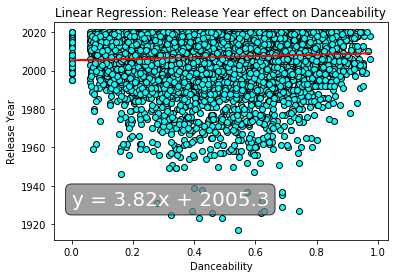

In [68]:
#Release Year analysis
release_year_coorelation = (st.pearsonr(sampled_data["Danceability"], sampled_data["Release Year"]))
print(f'The coorelation between Danceability and Release Year is {tempo_coorelation}.')

linear_regression = st.linregress(sampled_data["Danceability"], sampled_data["Release Year"])
#linear_regression

props = dict(boxstyle='round', facecolor='grey', alpha=0.75)
x_values = sampled_data["Danceability"]
y_values = sampled_data["Release Year"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,1930), fontsize=20, bbox=props, color="white")
plt.xlabel("Danceability")
plt.ylabel("Release Year")
plt.title("Linear Regression: Release Year effect on Danceability")


print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/release_year-danceability.png")
plt.show()